# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.


## Tópicos

Neste desafio você aprenderá:

- Python
- Pandas
- Sklearn
- Regression

## Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna `NU_NOTA_MT`) de quem participou do ENEM 2016. 

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `NU_NOTA_MT`.



## Approach
* Preprocessing
* Fill missing data
* Data encode

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
pd.set_option('display.max_columns', 200)

/home/bruno/codenation/data-science-1/venv/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set feature data types according to data dictionary file
dtypes = {'NU_INSCRICAO': 'object', 'NU_ANO': 'int64',
          'CO_MUNICIPIO_RESIDENCIA': 'int64', 'NO_MUNICIPIO_RESIDENCIA': 'category',
          'CO_UF_RESIDENCIA': 'category', 'SG_UF_RESIDENCIA': 'category',
          'NU_IDADE': 'int64', 'TP_SEXO': 'category', 'TP_ESTADO_CIVIL': 'category',
          'TP_COR_RACA': 'category', 'TP_NACIONALIDADE': 'category',
          'CO_MUNICIPIO_NASCIMENTO': 'object', 'NO_MUNICIPIO_NASCIMENTO': 'object',
          'CO_UF_NASCIMENTO': 'category', 'CO_UF_NASCIMENTO': 'object',
          'TP_ST_CONCLUSAO': 'int64', 'TP_ANO_CONCLUIU': 'int64', 'TP_ESCOLA': 'category',
          'TP_ENSINO': 'category', 'IN_TREINEIRO': 'category', 'CO_ESCOLA': 'object',
          'CO_MUNICIPIO_ESC': 'object', 'NO_MUNICIPIO_ESC': 'object',
          'CO_UF_ESC': 'category', 'SG_UF_ESC': 'object', 'TP_DEPENDENCIA_ADM_ESC': 'category',
          'TP_LOCALIZACAO_ESC': 'category', 'TP_SIT_FUNC_ESC': 'category',
          'IN_BAIXA_VISAO': 'category', 'IN_CEGUEIRA': 'category', 'IN_SURDEZ': 'category',
          'IN_DEFICIENCIA_AUDITIVA': 'category', 'IN_SURDO_CEGUEIRA': 'category',
          'IN_DEFICIENCIA_FISICA': 'category', 'IN_DEFICIENCIA_MENTAL': 'category',
          'IN_DEFICIT_ATENCAO': 'category', 'IN_DISLEXIA': 'category', 
          'IN_DISCALCULIA': 'category', 'IN_AUTISMO': 'category', 'IN_VISAO_MONOCULAR': 'category',
          'IN_OUTRA_DEF': 'category', 'IN_SABATISTA': 'category', 'IN_GESTANTE': 'category',
          'IN_LACTANTE': 'category', 'IN_IDOSO': 'category',
          'IN_ESTUDA_CLASSE_HOSPITALAR': 'category', 'IN_SEM_RECURSO': 'category',
          'IN_BRAILLE': 'category', 'IN_AMPLIADA_24': 'category', 'IN_AMPLIADA_18': 'category',
          'IN_LEDOR': 'category', 'IN_ACESSO': 'category', 'IN_TRANSCRICAO': 'category',
          'IN_LIBRAS': 'category', 'IN_LEITURA_LABIAL': 'category', 
          'IN_MESA_CADEIRA_RODAS': 'category', 'IN_MESA_CADEIRA_SEPARADA': 'category',
          'IN_APOIO_PERNA': 'category', 'IN_GUIA_INTERPRETE': 'category', 'IN_MACA': 'category',
          'IN_COMPUTADOR': 'category', 'IN_CADEIRA_ESPECIAL': 'category', 
          'IN_CADEIRA_CANHOTO': 'category', 'IN_CADEIRA_ACOLCHOADA': 'category', 
          'IN_PROVA_DEITADO': 'category', 'IN_MOBILIARIA_OBESO': 'category', 
          'IN_LAMINA_OVERLAY': 'category', 'IN_PROTETOR_AURICULAR': 'category',
          'IN_MEDIDOR_GLICOSE': 'category', 'IN_MAQUINA_BRAILE': 'category', 'IN_SOROBAN': 'category',
          'IN_MARCA_PASSO': 'category', 'IN_SONDA': 'category', 'IN_MEDICAMENTOS': 'category',
          'IN_SALA_INDIVIDUAL': 'category', 'IN_SALA_ESPECIAL': 'category', 
          'IN_SALA_ACOMPANHANTE': 'category', 'IN_MOBILIARIA_ESPECIFICO': 'category',
          'IN_MATERIAL_ESPECIFICO': 'category', 'IN_NOME_SOCIAL': 'category', 'IN_CERTIFICADO': 'category',
          'NO_ENTIDADE_CERTIFICACAO': 'object', 'CO_UF_ENTIDADE_CERTIFICACAO': 'category',
          'SG_UF_ENTIDADE_CERTIFICACAO': 'object', 'CO_MUNICIPIO_PROVA': 'object', 
          'NO_MUNICIPIO_PROVA': 'object', 'CO_UF_PROVA': 'category', 'SG_UF_PROVA': 'object',
          'TP_PRESENCA_CN': 'category', 'TP_PRESENCA_CH': 'category', 'TP_PRESENCA_LC': 'category',
          'TP_PRESENCA_MT': 'category', 'CO_PROVA_CN': 'category', 'CO_PROVA_CH': 'category',
          'CO_PROVA_LC': 'category', 'CO_PROVA_MT': 'category', 'NU_NOTA_CN': 'float64',
          'NU_NOTA_CH': 'float64', 'NU_NOTA_LC': 'float64', 'NU_NOTA_MT': 'float64',
          'TX_RESPOSTA_CN': 'object', 'TX_RESPOSTA_CH': 'object', 'TX_RESPOSTA_LC': 'object',
          'TX_RESPOSTA_MT': 'object', 'TP_LINGUA': 'category', 'TX_GABARITO_CN': 'object',
          'TX_GABARITO_CH': 'object', 'TX_GABARITO': 'object', 'TX_GABARITO_LC': 'object',
          'TX_GABARITO_MT': 'object', 'TP_STATUS_REDACAO': 'category', 'NU_NOTA_COMP1': 'float64',
          'NU_NOTA_COMP2': 'float64', 'NU_NOTA_COMP3': 'float64', 'NU_NOTA_COMP4': 'float64',
          'NU_NOTA_COMP5': 'float64', 'NU_NOTA_REDACAO': 'float64', 'Q001': 'category',
          'Q002': 'category', 'Q003': 'category', 'Q004': 'category', 'Q005': 'category',
          'Q006': 'category', 'Q007': 'category', 'Q008': 'category', 'Q009': 'category',
          'Q010': 'category', 'Q011': 'category', 'Q012': 'category', 'Q013': 'category',
          'Q014': 'category', 'Q015': 'category', 'Q016': 'category', 'Q017': 'category',
          'Q018': 'category', 'Q019': 'category', 'Q020': 'category', 'Q021': 'category',
          'Q022': 'category', 'Q023': 'category', 'Q024': 'category', 'Q025': 'category',
          'Q026': 'category', 'Q027': 'category', 'Q028': 'category', 'Q029': 'category',
          'Q030': 'category', 'Q031': 'category', 'Q032': 'category', 'Q033': 'category',
          'Q034': 'category', 'Q035': 'category', 'Q036': 'category', 'Q037': 'category',
          'Q038': 'category', 'Q039': 'category', 'Q040': 'category', 'Q041': 'category',
          'Q042': 'category', 'Q043': 'category', 'Q044': 'category', 'Q045': 'category',
          'Q046': 'category', 'Q047': 'category', 'Q048': 'category', 'Q049': 'category',
          'Q050': 'category'}

In [3]:
train = pd.read_csv('../data/train.csv', index_col='Unnamed: 0', dtype=dtypes)
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0,1,1,4314902,Porto Alegre,43,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5,5,1,0,0,5,5,0,5,5,5,5,5,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0,3,1,2304707,Granja,23,CE,2,0,2,1,0,23005157,2304707,Granja,23,CE,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1,140.0,120.0,120.0,120.0,80.0,580.0,A,A,A,

In [4]:
test = pd.read_csv('../data/test.csv', dtype=dtypes)
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3,0,2,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1,0,2,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
train.shape, test.shape

((13730, 166), (4576, 47))

As we can see, train and test datasets have different number of features. So let's filter the features from the train dataframe to fit the test

In [6]:
train = train[list(test.columns) + ['NU_NOTA_MT']]

In [7]:
# Create dataframe with important infos
def create_info(df):
    df_infos = pd.DataFrame({'column': df.columns,
                             'n_missing': df.isna().sum(),
                             'dtype': df.dtypes,
                             'n_unique': df.nunique()}).reset_index().drop('index', axis=1)
    return df_infos

In [8]:
train_infos = create_info(train)
train_infos.head()

,column,n_missing,dtype,n_unique
0,NU_INSCRICAO,0,object,13730
1,CO_UF_RESIDENCIA,0,category,27
2,SG_UF_RESIDENCIA,0,category,27
3,NU_IDADE,0,int64,55
4,TP_SEXO,0,category,2


In [9]:
# Drop columns that have no significance to the training model
train_infos = train_infos[train_infos['n_unique'] != 1]
# Visualize categorical columns by quantity of unique values
train_infos[train_infos['dtype'] == 'category'].sort_values('n_unique', ascending=False)

,column,n_missing,dtype,n_unique
1,CO_UF_RESIDENCIA,0,category,27
2,SG_UF_RESIDENCIA,0,category,27
41,Q006,0,category,17
45,Q027,7373,category,13
25,CO_PROVA_CH,0,category,10
24,CO_PROVA_CN,0,category,10
32,TP_STATUS_REDACAO,3597,category,9
27,CO_PROVA_MT,0,category,9
26,CO_PROVA_LC,0,category,9
40,Q002,0,category,8


In [10]:
# Remove object variables
train_infos = train_infos[train_infos['dtype'] != 'object']

In [11]:
# Numerical variables
col_int = train_infos['dtype'] == 'int64'
col_float = train_infos['dtype'] == 'float64'
# Categorical variables
col_cat = train_infos['dtype'] == 'category'
num_features = list(train_infos[col_int | col_float]['column'])
cat_features = list(train_infos[col_cat]['column'])
features = num_features + cat_features

In [12]:
train_infos[train_infos['n_missing'] > 0]

,column,n_missing,dtype,n_unique
10,TP_ENSINO,9448,category,3
12,TP_DEPENDENCIA_ADM_ESC,9448,category,4
28,NU_NOTA_CN,3389,float64,2692
29,NU_NOTA_CH,3389,float64,2978
30,NU_NOTA_LC,3597,float64,2774
32,TP_STATUS_REDACAO,3597,category,9
33,NU_NOTA_COMP1,3597,float64,15
34,NU_NOTA_COMP2,3597,float64,13
35,NU_NOTA_COMP3,3597,float64,12
36,NU_NOTA_COMP4,3597,float64,14


In [13]:
num_values = dict(zip(num_features, np.zeros(len(num_features))))

train.fillna(num_values, inplace=True)
#train.fillna('None', inplace=True)

In [14]:
df = train[features]
df.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,TP_LINGUA,TP_STATUS_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
1,24,1,4,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,399.4,43,RS,M,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,1,1,D,D,C,A,A,C,H,A
2,17,2,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,459.8,23,CE,F,3,1,2,1,0,2,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,1,1,A,A,B,A,A,A,NaN,A
3,21,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,CE,F,3,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,1,NaN,D,D,C,A,A,A,NaN,A
4,25,1,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,RJ,F,0,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0,NaN,H,E,E,C,B,C,F,D
5,28,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,AM,M,2,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,1,NaN,E,D,C,A,A,B,F,A


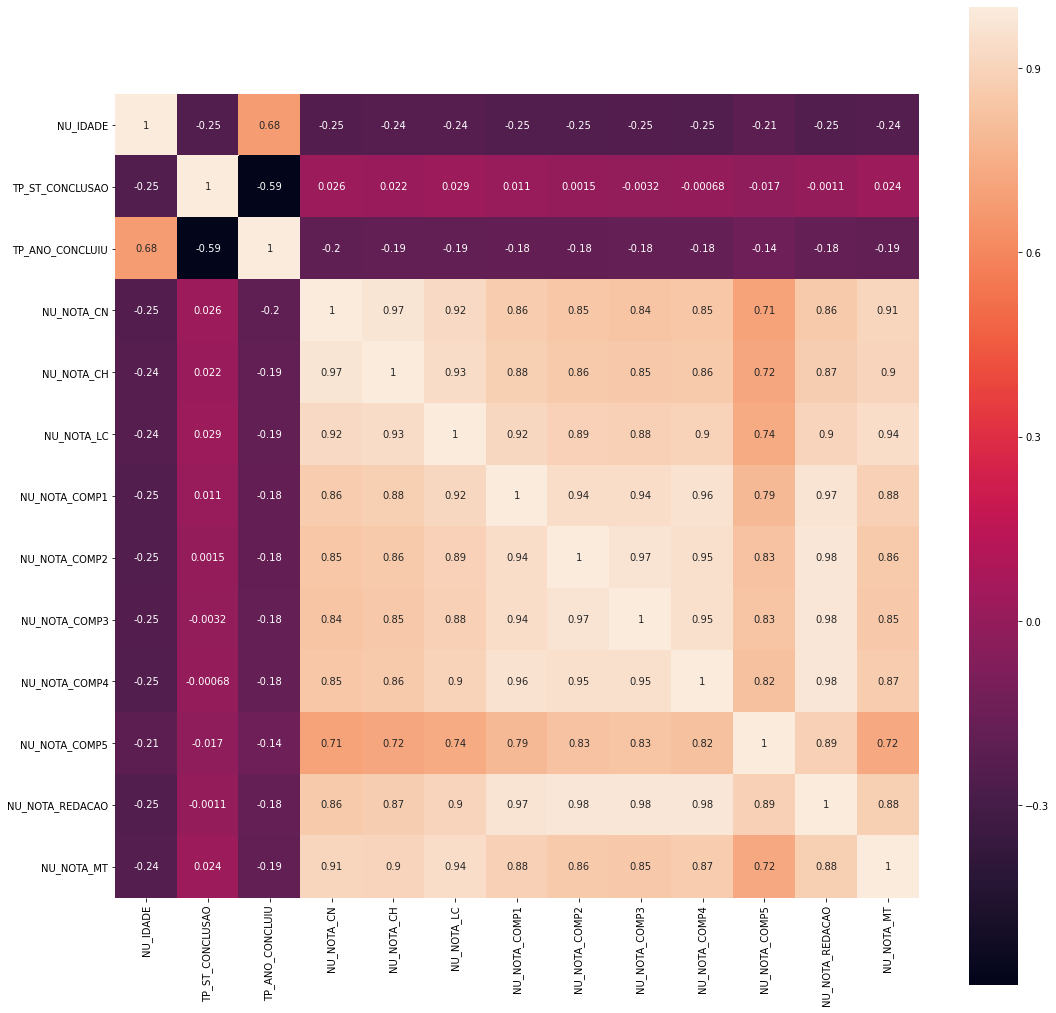

In [15]:
plt.figure(figsize=(18, 18))
sns.heatmap(df[num_features].corr(), annot=True, square=True)

plt.show()

## Encoding

In [16]:
# One-hot encoding categorical features from dataframe
pre_train = pd.get_dummies(df)
pre_train.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT,CO_UF_RESIDENCIA_11,CO_UF_RESIDENCIA_12,CO_UF_RESIDENCIA_13,CO_UF_RESIDENCIA_14,CO_UF_RESIDENCIA_15,CO_UF_RESIDENCIA_16,CO_UF_RESIDENCIA_17,CO_UF_RESIDENCIA_21,CO_UF_RESIDENCIA_22,CO_UF_RESIDENCIA_23,CO_UF_RESIDENCIA_24,CO_UF_RESIDENCIA_25,CO_UF_RESIDENCIA_26,CO_UF_RESIDENCIA_27,CO_UF_RESIDENCIA_28,CO_UF_RESIDENCIA_29,CO_UF_RESIDENCIA_31,CO_UF_RESIDENCIA_32,CO_UF_RESIDENCIA_33,CO_UF_RESIDENCIA_35,CO_UF_RESIDENCIA_41,CO_UF_RESIDENCIA_42,CO_UF_RESIDENCIA_43,CO_UF_RESIDENCIA_50,CO_UF_RESIDENCIA_51,CO_UF_RESIDENCIA_52,CO_UF_RESIDENCIA_53,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,TP_ESCOLA_4,TP_ENSINO_1,TP_ENSINO_2,TP_ENSINO_3,IN_TREINEIRO_0,IN_TREINEIRO_1,TP_DEPENDENCIA_ADM_ESC_1,TP_DEPENDENCIA_ADM_ESC_2,TP_DEPENDENCIA_ADM_ESC_3,TP_DEPENDENCIA_ADM_ESC_4,IN_BAIXA_VISAO_0,IN_BAIXA_VISAO_1,IN_SURDEZ_0,IN_SURDEZ_1,IN_DISLEXIA_0,IN_DISLEXIA_1,IN_DISCALCULIA_0,...,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1,TP_STATUS_REDACAO_3,TP_STATUS_REDACAO_4,TP_STATUS_REDACAO_5,TP_STATUS_REDACAO_6,TP_STATUS_REDACAO_7,TP_STATUS_REDACAO_8,TP_STATUS_REDACAO_9,TP_STATUS_REDACAO_2,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q027_A,Q027_B,Q027_C,Q027_D,Q027_E,Q027_F,Q027_G,Q027_H,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
1,24,1,4,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,399.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

## Feature Selection

In [17]:
# pca = PCA(n_components=3)
# projected = pca.fit_transform(pre_train)
# pca.explained_variance_ratio_

In [18]:
# # Number of components
# n_pc = pca.components_.shape[0]
# # Get index of the most important feature on each component
# most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pc)]
# most_important_features = [list(pre_train.columns)[most_important[i]] for i in range(n_pc)]
# dic = {'PC{}'.format(i): most_important_features[i] for i in range(n_pc)}
# dic

## Model Testing

In [19]:
y = pre_train['NU_NOTA_MT']
X = pre_train.drop('NU_NOTA_MT', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.shape, X_test.shape

((10297, 225), (3433, 225))

In [20]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_predicted = reg.predict(X_test)
r2 = r2_score(y_test, y_pred=y_predicted)
print('R² Score: {}'.format(r2))

R² Score: 0.922876459807582


## Model Tuning

In [21]:
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

reg2 = LinearRegression()
clf = GridSearchCV(reg2, param_grid=param_grid, cv=5, verbose=50,
                   return_train_score=True)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=(train=0.921, test=-6933001362717030400.000), total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=(train=0.921, test=-248096762477333717188608.000), total=   0.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=(train=0.923, test=-523394433943820173312.000), total=   0.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[CV] fit_intercept=True, normalize=True ..............................
[CV]

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             return_train_score=True, verbose=50)

In [22]:
y_predicted = clf.predict(X_test)
r2 = r2_score(y_test, y_predicted)
print('R² Score: {}'.format(r2))

R² Score: 0.922878055025533


After tuning the Linear Regression model, we have gained just 0.000002 of performance according to r2 score

## Getting NU_NOTA_MT from test dataframe

In [28]:
try:
    features.remove('NU_NOTA_MT')
except:
    pass
test.fillna(num_values, inplace=True)
test_df = test[features]
test_final = pd.get_dummies(test_df)
set_train = set(pre_train.columns)
set_train.remove('NU_NOTA_MT')
set_test = set(test_final.columns)
for column in list(set_train - set_test):
    test_final[column] = 0
test_prediction = clf.predict(test_final)

In [ ]:
answer = pd.DataFrame({'NU_INSCRICAO': test['NU_INSCRICAO'],
                       'NU_NOTA_MT': test_prediction})
answer['NU_NOTA_MT'] = answer['NU_NOTA_MT'].apply(lambda x: 0 if x<300 else x)
answer.to_csv('../output/answer.csv', index=False)